In [1]:
#Importing the Libraries

In [2]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import math

import pickle

In [3]:
# Read the Dataset

In [4]:
train=pd.read_csv(r'train.csv')
features=pd.read_csv(r'features.csv')
stores=pd.read_csv(r'stores.csv')

In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05-02-2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12-02-2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19-02-2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26-02-2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05-03-2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
# Descriptive Analysis

In [9]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [10]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,0.0,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,NaN,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,NaN,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,NaN,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,NaN,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,NaN,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,NaN,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,NaN,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [11]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [12]:
# Data Pre-Processing

In [13]:
# Checking for Null values

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     0 non-null      float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [16]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [17]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [18]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       8190
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [19]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [20]:
data = train.merge(features, on=['Store', 'Date'],
                  
                  how='inner').merge(stores, on=['Store'], how='inner')
print(data.shape)

(0, 17)


In [21]:
data['MarkDown1'] = data['MarkDown1'].replace(np.nan, 0)
data['MarkDown2'] = data['MarkDown2'].replace(np.nan, 0)
data['MarkDown3'] = data['MarkDown3'].replace(np.nan, 0)
data['MarkDown4'] = data['MarkDown4'].replace(np.nan, 0)
data['MarkDown5'] = data['MarkDown5'].replace(np.nan, 0)

In [22]:
#Handling Negative Values

In [23]:
data.describe()

,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Store,Size
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data = data[data['Weekly_Sales'] >= 0]

In [25]:
data.describe()

,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Store,Size
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Exploratory Data Analysis

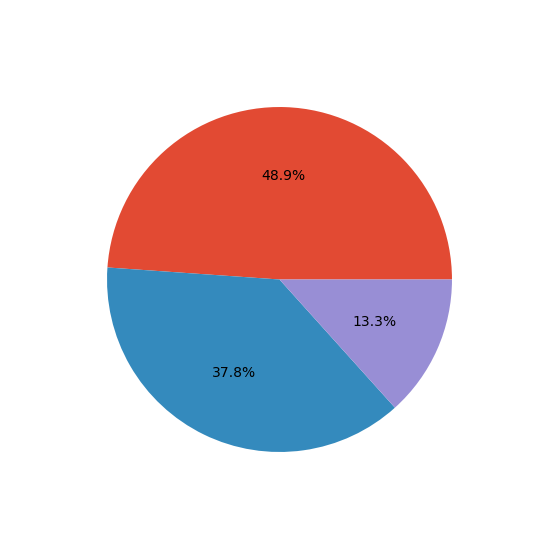

In [27]:
sorted_type = stores.groupby('Type')
plt.style.use('ggplot')
lables=['A store' , 'B store', 'C store']
sizes=sorted_type.describe()['Size'].round(1)
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100]
fig, axes = plt.subplots(1,1, figsize=(7,7))

axes.pie(sizes,
        
         explode=(0.0,0,0),
         autopct='%1.1f%%',
         pctdistance=0.6,
         labeldistance=1.2,
         radius=0.8,
         center=(0.5,0.5))
plt.show()
                                               

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

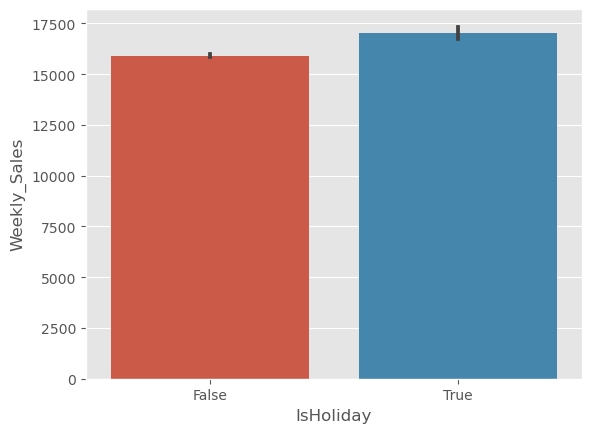

In [28]:
# Weekly Sales on Holidays
holiday = train['Weekly_Sales'].loc[train['IsHoliday']== True]

# Weekly Sales on NoN-Holidays
non_holiday = train['Weekly_Sales'].loc[train['IsHoliday']== False]
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_14544\733992579.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


Text(0.5, 1.0, 'Correlation Matrix')

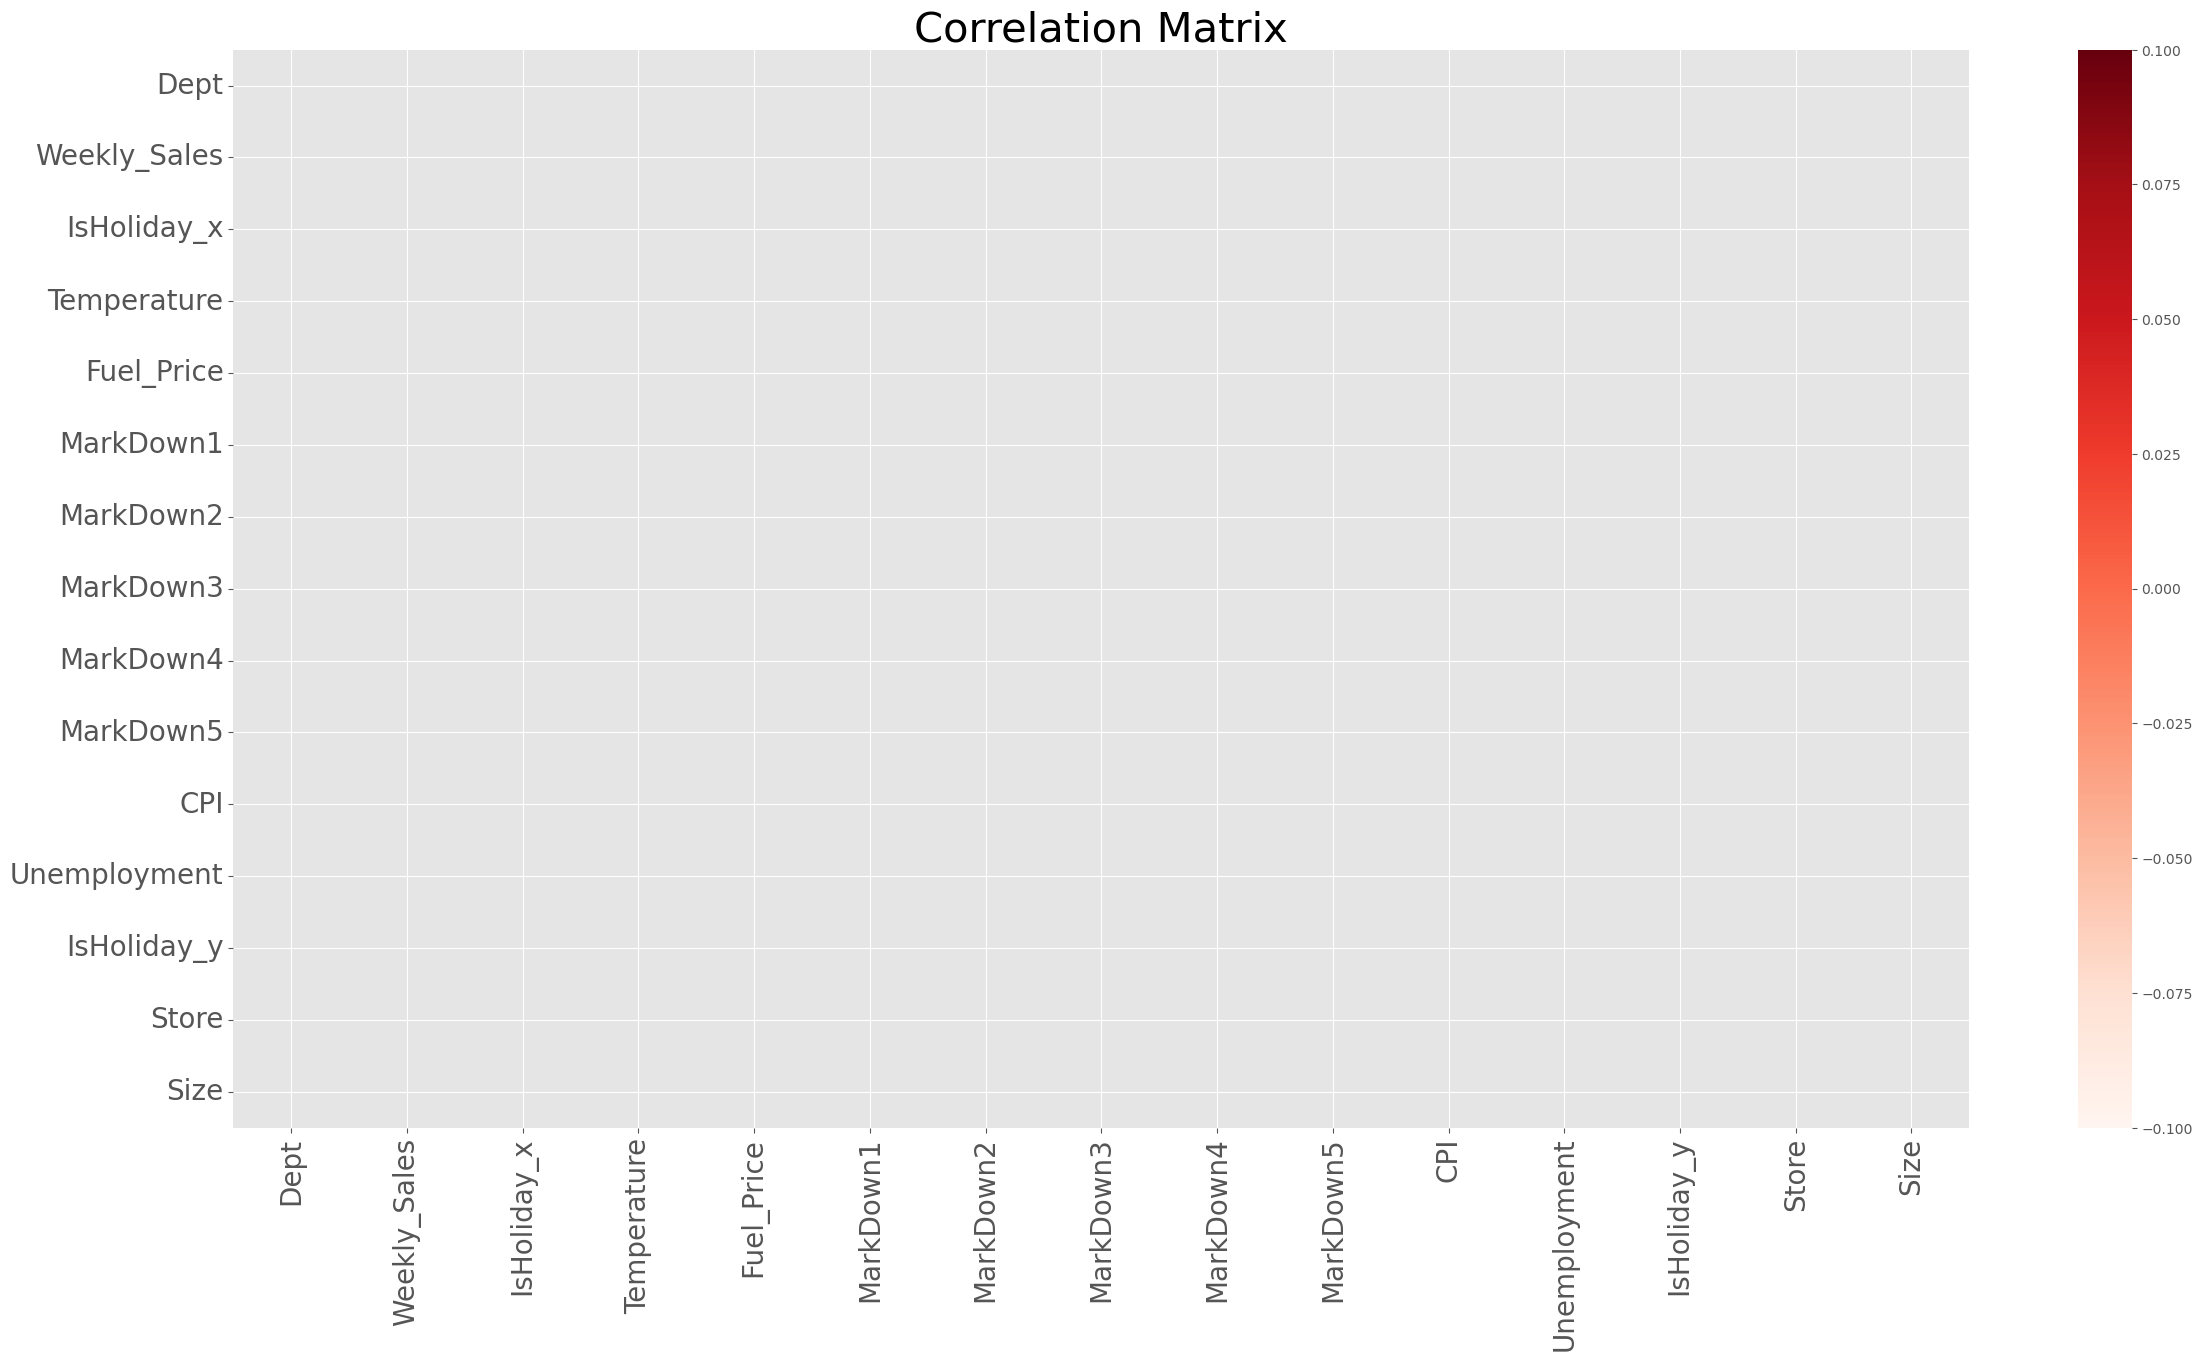

In [29]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

sns.heatmap(data.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30)

In [30]:
#Handling Categorical Values

In [31]:
data=pd.get_dummies(data,columns=['Type'])

In [32]:
data['Date'] = pd.to_datetime(data['Date'])

In [33]:
data['month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [43]:
data[['Date', 'month', 'Year']].head()

,Date,month,Year


In [35]:
data['dayofweek_name']= data['Date'].dt.day_name()
data[['Date', 'dayofweek_name']].head()

,Date,dayofweek_name


In [36]:
data['is_weekend'] = np.where(data['dayofweek_name'].isin(['Sunday', 'Saturday']), 1,0)
data[['Date', 'is_weekend']].head()

,Date,is_weekend


In [37]:
data["IsHoliday_x"] = data["IsHoliday_x"].astype(int)
del data['dayofweek_name']
# del data['Date']


In [38]:
print(data.head())

Empty DataFrame
Columns: [Dept, Date, Weekly_Sales, IsHoliday_x, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, IsHoliday_y, Store, Size, month, Year, is_weekend]
Index: []


In [39]:
data.to_csv('merged_data.csv', index=False)

In [40]:
#splitting Data Into Train and Test

In [42]:
from sklearn.model_selection import train_test_split


X = data.loc[:, data.columns != 'Weekly_Sales']
y = data.loc[:, data.columns == 'Weekly_Sales']

X = X[["Store", "Dept", "Size", "IsHoliday_x", "CPI", "Temperature", "Type_B", "Type_C", "month", "Year", "IsHoliday_y"]]

y = y.values.reshape(-1, 1)
print(X.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



KeyError: "['Type_B', 'Type_C'] not in index"

In [ ]:
# Model Building

In [ ]:
# Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150, max_depth=30, min_samples_split=5, min_samples_leaf=1)
rf.fit(X_train, y_train.ravel())

print('Testing Accuracy:', rf.score(X_test, y_test.ravel()) * 100, '%')

y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rms)

print('MAE:', mean_absolute_error(y_test, y_pred))


In [ ]:
print('Training Accuracy:', rf.score(X_train, y_train.ravel())*100, '%')


In [ ]:
# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)

In [ ]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
print('Testing Accuracy:', dt.score(X_test, y_test.ravel())*100, '%')

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rms)

print('MAE:', mean_absolute_error(y_test, y_pred))


In [ ]:
print('Training Accuracy:', dt.score(X_train, y_train.ravel())*100, '%')

In [ ]:
# XGBoost

In [ ]:

import xgboost as xgb
import warnings


In [ ]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', nthread=4,
                         n_estimators=500, max_depth=4, learning_rate=0.5)
xg_reg.fit(X_train, y_train)

In [ ]:
pred=xg_reg.predict(X_train)
y_pred=xg_reg.predict(X_test)

In [ ]:
print("Accuracy:",xg_reg.score(X_test, y_test)*100, '%')

rms = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rms)

print('MAE:', mean_absolute_error(y_test, y_pred))

In [ ]:
print('Training  Accuracy:', xg_reg.score(X_train, y_train)*100, '%')

In [ ]:
# Arima

In [ ]:
import pmdarima

from pmdarima.arima  import auto_arima

In [ ]:
data.Date = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data.Date
data = data.drop('Date', axis = 1)
data = data.resample('MS').mean()
#Resampling the time series  data with month Starting first.
#Train-Testing splitting of time series data 

train_data = data[:int(0.7*(len(data)))]
test_data = data[int(0.7*(len(data))):]

train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']
#Plot of Weekly_Sales with respect  to years in train and test
train_data.plot(figsize=(20,8), title='Weekly_Sales', fontsize = 14)
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [ ]:
model_auto_arima = auto_arima(train_data, trace=True, error_actions='ignore',
                             suppress_warnings=True)
model_auto_arima = auto_arima(train_data, trace=True, start_p=0, start_q=0, start_P=0,
                             start_Q=0, max_p=10, max_q=10, max_P=10, max_Q=10,
                             seasonal=True, stepwise=False, suppress_warnings=True,
                             D=1, max_D=10, error_action='ignore', approximation = False)
model_auto_arima.fit(train_data)

In [ ]:
forecast= model_auto_arima.predict(n_periods = len(test_data))
forecast=pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Auto  ARIMA model', fontsize=20)
                                   
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label='Prediction using ARIMA Model')
                                   
plt.legend(loc='best')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import math

print('Mean Squared Error (MSE) of ARIMA:', mean_squared_error(test_data, forecast))
print('Root Mean Squared Error (RMSE) of ARIMA:', math.sqrt(mean_squared_error(test_data, forecast)))
print('Mean Absolute Deviation (MAD) of ARIMA:', mean_absolute_error(test_data, forecast))

In [ ]:
#Comparing the Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


rf = RandomForestRegressor(n_estimators=58, max_depth=27, min_samples_split=3,
                           min_samples_leaf=1)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)



In [ ]:

from prettytable import PrettyTable

tb=PrettyTable()
tb.fields_names = ["Model", "Training Accuracy", "Testing Accuracy", "RMSE", "MAE/MAD(Arima)"]
tb.add_row(["Random Forset", 99.07, 96.72, 4133.40, 1628.41])
tb.add_row([" Decision Tree", 100.0, 94.56, 5323.15, 2038.82])
tb.add_row(["XgBoost", 94.04, 94.04, 5572.25, 3104.22])
tb.add_row(["ARIMA", '-', '-', 685.54, 446.99])
print(tb)

In [ ]:

from sklearn.model_selection import cross_val_score


rf = RandomForestRegressor(n_estimators=58, max_depth=27, min_samples_split=3, min_samples_leaf=1)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)


In [ ]:
cv = cross_val_score(rf,X,y.ravel(),cv=6)

In [ ]:
np.mean(cv)

In [ ]:
pickle.dump(rf, open('rf_model.pkl', 'wb'))

In [ ]:
# Application Building 

In [ ]:
import pandas as pd
from numpy.core.fromnumeric import size

from sklearn.model_selection import train_test_split
from flask import Flask, render_template, request
import pickle
import datetime as dt
import calendar
import os




In [ ]:
from flask import Flask, render_template, request
import pickle
app= Flask(__name__)
loaded_model = pickle.load(open('rf_model.pkl', 'rb'))
fet = pd.read_csv('merged_data.csv')

In [ ]:
@app.route('/')
def home():
    return render_template('index.html')

In [ ]:
@app.route('/predict', methods=['POST'])
def predict():
    store = request.form.get('store')
    dept = request.form.get('dept')
    date = request.form.get('date')
    isHoliday = request.form['isHolidayRatio']
    size = request.form.get('size')
    temp = request.form.get('temp')
    d=dt.datetime.strptime(date, '%Y-%m-%d')
    year = (d.year)
    month = d.month
    month_name = calendar.month_name[month]
    print("year =", type(year))
    print("year val= ", year, type(year), month)
    X_test = pd.DateFrame({'Store':[store], 'Dept': [dept],  'Size': [size],
                           'Temperature':[temp], 'CPI':[212], 'Markdown4':[2050],
                           'IsHoliday': [isHoliday], 'Type_B': [0], 'Type_C': [1], 
                           'month': [month], 'year': [year]})
    print("X_test =", X_test.head())
    print("type of X_test=", type(X_test))
    print("predict =", store, dept, date, isHoliday)
    
    y_pred = loaded_model.predict(X_test)
    output = round(y_pred[0],2)
    print("predicted = ", output)
    return render_template('index.html', output = output, store = store, dept = dept, month_name = month_name, year = year)
port = os.getenv('VCAP_APP_PORT', '8080')

In [ ]:

if __name__ == " __main__":
    app.secret_key=os.urandom(12)
    app.run(debug=False, host='0.0.0.0', port=port)